In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [4]:
# Read the csv file
df1 = pd.read_csv(r'percentage_in_rooms_dataset.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   part_id                290 non-null    int64  
 1   Percentage_Bathroom    290 non-null    float64
 2   Percentage_Bedroom     290 non-null    float64
 3   Percentage_Kitchen     290 non-null    float64
 4   Percentage_Livingroom  290 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.5 KB


## **Merge two datasets (clinical and room_time_percentage) based on part_id column**


In [5]:
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI_In_Health/mariarevythi/clinical_dataset_corrected.csv')
#df2 = pd.read_csv(r'clinical_dataset_corrected.csv')

print("Number of fields in the df2:", df2.shape[1])

# Merge the two datasets based on the part_id column
merged_df = pd.merge(df2, df1, on='part_id', how='inner')
print("Number of fields in the merged_df:", merged_df.shape[1])

#merged_df.info();
#merged_df.head(10)

Number of fields in the df2: 55
Number of fields in the merged_df: 59


# **Clustering**


In [6]:
# Exclude the fields you don't want to be included
excluded_fields = ['part_id', 'fried', 'weight_loss', 'exhaustion_score', 'gait_speed_slower'
                   , 'grip_strength_abnormal', 'low_physical_activity']
selected_data = merged_df.drop(excluded_fields, axis=1)
#print(selected_data.columns[0], selected_data.columns[1])


## **K-Means**


In [7]:
# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10)  # You can set n_init to any value you prefer
kmeans.fit(selected_data)
clusters = kmeans.predict(selected_data)

# Evaluate the clustering using Silhouette index
silhouette_avg = silhouette_score(selected_data, clusters)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.4100121104623478


## **PCA**


In [9]:
# Perform PCA for dimensionality reduction
# n_components must be between 0 and min(n_samples, n_features)=53
pca = PCA(n_components=2)  # You can adjust the number of components as needed
reduced_data = pca.fit_transform(selected_data)

# Perform KMeans clustering with n_init explicitly set to 10
kmeans = KMeans(n_clusters=3, n_init=10)  # You can adjust the number of clusters as needed
clusters = kmeans.fit_predict(reduced_data)

# Calculate Silhouette score
silhouette_avg = silhouette_score(reduced_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.6122955088968816


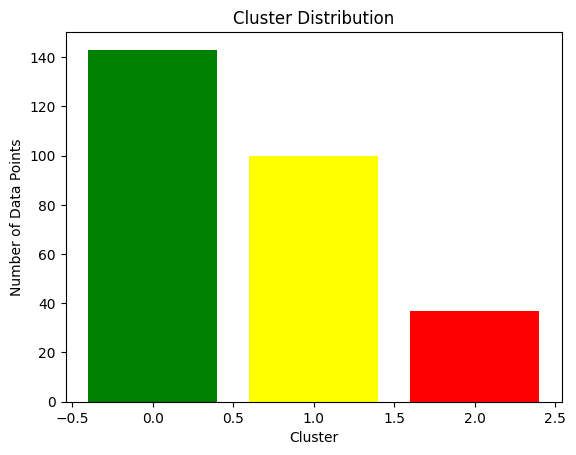

In [10]:
# Count the number of data points in each cluster
cluster_counts = pd.Series(clusters).value_counts()

# Define custom colors for each cluster
colors = ['green', 'yellow', 'red', 'blue', 'orange', 'purple', 'pink', 'cyan', 'brown']

# Create a bar plot with customized colors
plt.bar(range(len(cluster_counts)), cluster_counts, color=colors)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Cluster Distribution')
plt.show()


In [11]:
# calculates the majority label in each cluster.

# Adding the cluster assignments to the original dataset
merged_df['cluster'] = clusters

# Calculating the majority label in each cluster
for cluster_num in range(3):
    cluster_data = merged_df[merged_df['cluster'] == cluster_num]
    majority_label = cluster_data['fried'].mode()[0]
    print(f"Cluster {cluster_num} is mostly comprised of: {majority_label}")

# visualize the distribution of labels within each cluster using value_counts()
for cluster_num in range(3):
    cluster_data = merged_df[merged_df['cluster'] == cluster_num]
    label_distribution = cluster_data['fried'].value_counts()
    print(f"Label distribution in Cluster {cluster_num}:\n{label_distribution}")



Cluster 0 is mostly comprised of: 1
Cluster 1 is mostly comprised of: 0
Cluster 2 is mostly comprised of: 1
Label distribution in Cluster 0:
fried
1    68
0    58
2    17
Name: count, dtype: int64
Label distribution in Cluster 1:
fried
0    21
1    10
2     6
Name: count, dtype: int64
Label distribution in Cluster 2:
fried
1    47
0    41
2    12
Name: count, dtype: int64
